## Gold Price Prediction

Gold is not just a commodity or a heavy metal, it is an investment, it plays an important role in deciding the rate of a currency so its good to now the most beneficial time to invest in it so that it is a profitable investment just like any other stock.This project will help you decide whether you should invest in Gold on a certain day or not. For the purpose of prediction we will be using the data from kaggle

Everyday the prices fluctuate, and we just cannot invest on other random day, we need to invest on the day when the prices are lower, so the investment is profitable. 

For this purpose, we will be creating a model that can predict if the next day is a good day to onvest in gold or not using Linear regression along with other methods of data science.
Once the data is collected we will perform various operations on it and then have a machine learnng model to predict the best time for a profictable investment

### Import the libraries

In [56]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import sweetviz as sv
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score

#### Suppress Scientific Notations

In [2]:
np.set_printoptions(suppress=True)

### Data Acquisition

In [23]:
data = pd.read_csv('GoldPrices.csv')
data.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,No. of Shares,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
0,2010-01-04,109.820000,110.139999,109.309998,109.800003,109.800003,16224100,7430,5848,7430,100.0,0.03,-0.03
1,2010-01-05,109.879997,110.389999,109.260002,109.699997,109.699997,14213100,310,244,310,100.0,0.00,0.00
2,2010-01-06,110.709999,111.769997,110.410004,111.510002,111.510002,24981900,75,62,75,100.0,0.00,0.00
3,2010-01-07,111.070000,111.290001,110.620003,110.820000,110.820000,13609800,1050,913,1050,100.0,0.00,0.00
4,2010-01-08,111.519997,111.580002,110.260002,111.370003,111.370003,15894600,400,364,400,100.0,0.00,0.00


The data that we have is for everyday opening price, closing price, low and high price of the gold. 

### Exploratory Data Analysis

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning.

In [24]:
data.shape

(2735, 13)

In [25]:
data.isnull().sum()

Date                         0
Open                         0
High                         0
Low                          0
Close                        0
Adj Close                    0
Volume                       0
No. of Shares                0
Total Turnover               0
Deliverable Quantity         0
% Deli. Qty to Traded Qty    0
Spread H-L                   0
Spread C-O                   0
dtype: int64

In [26]:
report= sv.analyze(data)

:FEATURES DONE:                    |█████████████████████| [100%]   00:03  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [27]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


From the above analysis, we deduce that 

1. There are 2735 rows of data
2. 13 features
3. No duplicate or null data is present in our dataset
4. There is no categorical data

### Visualizations

Visualizations are an important part of exploratory data analysis as it helps us find the patterns in our dataset in the most easiest and simplest way possible.


For the purpose of visualizations we are using matplotlib and seaborn library provided by python.

#### Distribution of closing price over the range

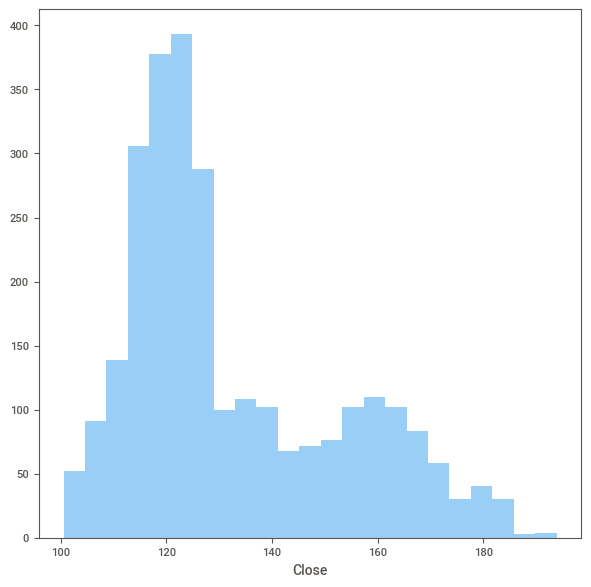

In [28]:
plt.figure(figsize=(7,7))
sns.distplot(data['Close'],kde = False)


The above Histogram shows us the division of closing price in our data set as we can see maximum percentage of the closing price in our dataset lies in the range of 110 and 125

#### Variation of closing price of gold over a period of time

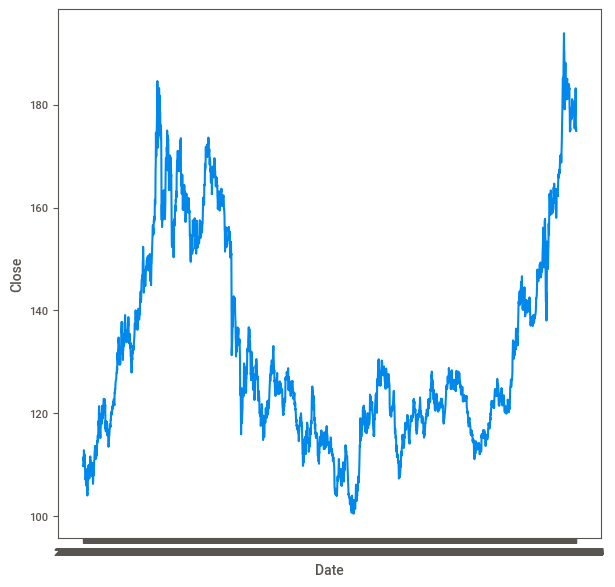

In [29]:
plt.figure(figsize=(7,7))
           
sns.lineplot(x='Date', y='Close', data=data)

The above time plot shows the corelation between the data and the closing price. It shows us how over the period of time the closing price of GOLD has been changing.

#### Correlation between the closing price and the opening price of Gold

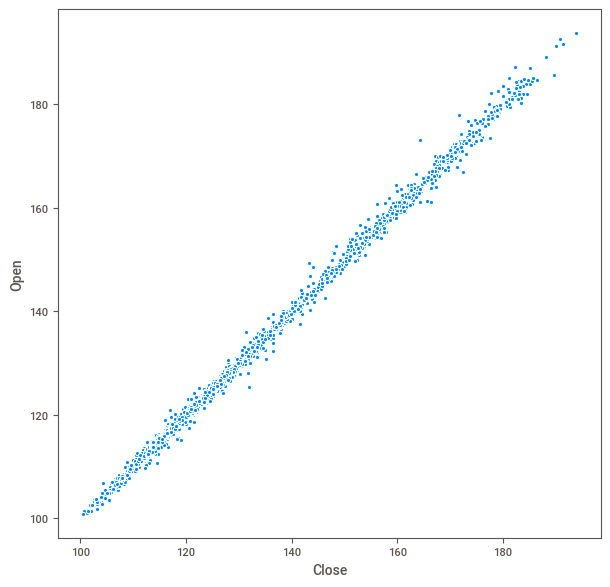

In [30]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="Close", y="Open",data=data);

A scatterplot is a perfect way to show the relation between two numerical variables. And here we have 2 scatterplots i.e. the above and below graphs.

1. The relation between Open and close price
2. The relation between Close and Low price

From both the graphs we can see that there is a linear relation among these variables, which would be very helpful for us in deciding the model.

#### Relation between closing price and low price 

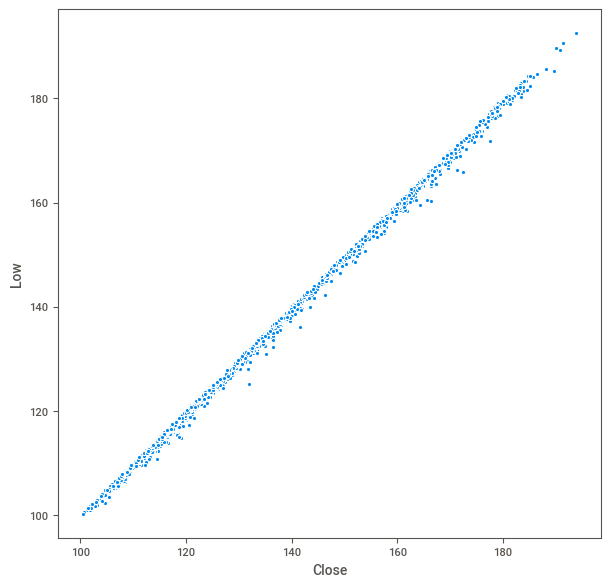

In [31]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="Close", y="Low",data=data);

### Statistical Analysis

Statistical analysis is the collection and interpretation of data in order to uncover patterns and trends.

In [32]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,No. of Shares,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
count,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2.735000e+03,2735.000000,2.735000e+03,2735.000000,2735.000000,2735.000000,2735.000000
mean,132.384318,132.985188,131.732113,132.380534,132.380534,1.037067e+07,85871.219378,2.841781e+06,87174.020110,86.144651,2.524585,0.044007
std,20.084848,20.228368,19.864920,20.076079,20.076079,6.724284e+06,119549.656459,3.494686e+06,99244.877631,17.620222,3.862221,1.750434
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,1.000000,0.000000e+00,1.000000,4.760000,0.000000,-17.150000
25%,117.989998,118.524998,117.400002,117.959999,117.959999,6.157000e+06,14205.000000,3.638150e+04,6838.000000,75.260000,0.120000,-0.200000
50%,125.040001,125.459999,124.540001,124.959999,124.959999,8.676800e+06,30370.000000,1.464957e+06,54621.000000,94.750000,1.050000,0.000000
75%,146.699997,147.315002,145.895004,146.599998,146.599998,1.247715e+07,123972.000000,4.517022e+06,140524.500000,100.000000,2.510000,0.180000
max,193.740005,194.449997,192.520004,193.889999,193.889999,9.380420e+07,849341.000000,2.383048e+07,631381.000000,104.000000,24.650000,15.300000


The above table shows the mean, median and differntial percentiles of the data. We can make the following observations from the above table 
  
1. The count is 2735.
2. The minimum Opening, closing, Low and high price are close to each other at ~100
3. There is a significant difference between the 75% and the maximum values for volume, number of shares, spread H-L which signifies the presence of outliers in our data


### Correlations Heat map

The easiest way to find the correlations between the features of a dataset is by creating a heat map which would visually help in figuring out which features are high interdependent and which are losely bounded to each other. 

,Open,High,Low,Close,Adj Close,Volume,No. of Shares,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Open,1.000000,0.999516,0.999349,0.998917,0.998917,0.279297,-0.251567,-0.240884,0.015461,0.207320,-0.218753,-0.041787
High,0.999516,1.000000,0.999170,0.999473,0.999473,0.288541,-0.250838,-0.242338,0.016460,0.208357,-0.220748,-0.041655
Low,0.999349,0.999170,1.000000,0.999526,0.999526,0.261219,-0.251254,-0.240192,0.014813,0.205352,-0.216394,-0.040126
Close,0.998917,0.999473,0.999526,1.000000,1.000000,0.272593,-0.251480,-0.241779,0.014941,0.207169,-0.218233,-0.040573
Adj Close,0.998917,0.999473,0.999526,1.000000,1.000000,0.272593,-0.251480,-0.241779,0.014941,0.207169,-0.218233,-0.040573
Volume,0.279297,0.288541,0.261219,0.272593,0.272593,1.000000,-0.142419,-0.142839,-0.080469,0.179068,-0.165324,-0.060270
No. of Shares,-0.251567,-0.250838,-0.251254,-0.251480,-0.251480,-0.142419,1.000000,0.314160,0.597112,-0.404116,-0.118548,-0.073252
Total Turnover,-0.240884,-0.242338,-0.240192,-0.241779,-0.241779,-0.142839,0.314160,1.000000,0.349857,-0.314565,0.390214,-0.030753
Deliverable Quantity,0.015461,0.016460,0.014813,0.014941,0.014941,-0.080469,0.597112,0.349857,1.000000,-0.315457,0.143490,-0.027458
% Deli. Qty to Traded Qty,0.207320,0.208357,0.205352,0.207169,0.207169,0.179068,-0.404116,-0.314565,-0.315457,1.000000,-0.218398,0.016047


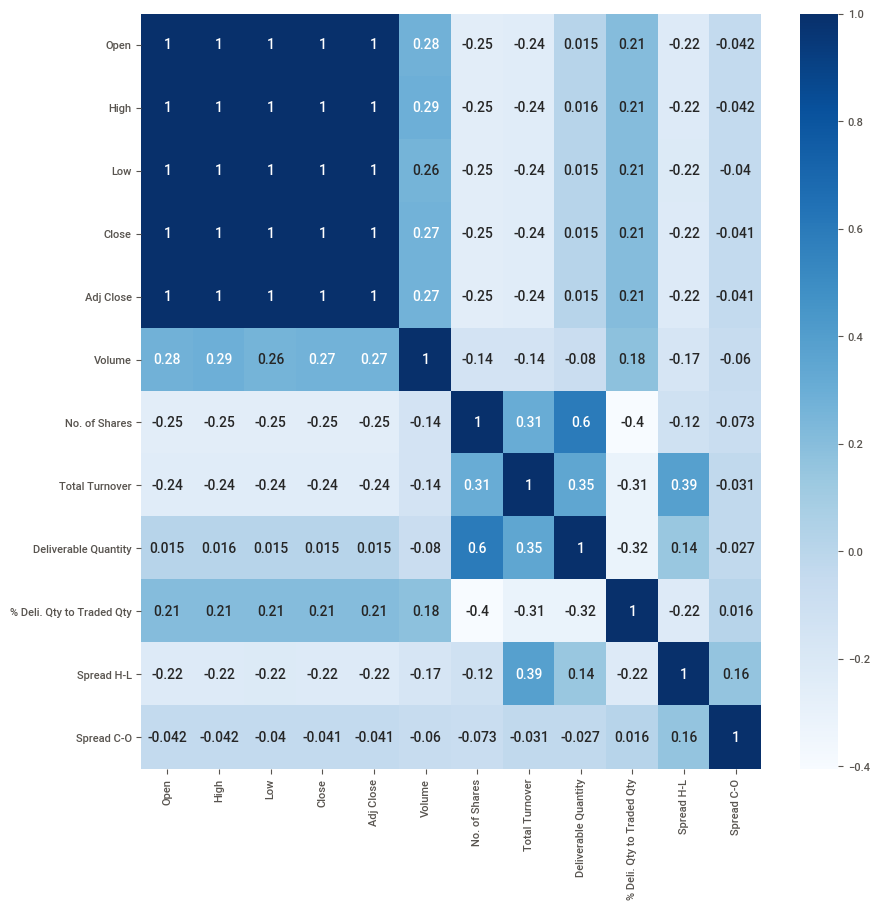

In [33]:
plt.figure(figsize=(10,10))
c= data.corr()
sns.heatmap(c,cmap='Blues',annot=True)
c

The heatmap visualized above shows us that

1. Open, Close, High, Low and WAP are highly correlated to each other.
2. Deliverable Quantity anf No. of Share are dependent on each other. 
3. Open, Close, High, Low and WAP are highly correlated with Spread H.L 


## Feature Engineering

The results you achieve are a factor of the model you choose, the data you have available and the features you prepared. Even your framing of the problem and objective measures you’re using to estimate accuracy play a part. Your results are dependent on many inter-dependent properties. That's why it is important to implement feature engineering 

As we have already seen above there is no null values in our data. Therefore, there is no need of imputation

Neither does our data have any categorical values so there is no need of categorical imputaion as well.

There are few features in our data that has outliers 

There are 2 ways of handling outliers 

1. Dropping the data that constitute as the outlier
2. Capping the data

Since our data has lots of outliers it is not a smart move to just delete the data. therefore, instead of dropping we would be capping the outliers using the 95th percentile as the upper limit and 5th percentile as the lower limit.

In [15]:
upper_lim = data['Open'].quantile(.95)
lower_lim = data['Open'].quantile(.05)
data.loc[(data['Open'] > upper_lim),'Open'] = upper_lim
data.loc[(data['Open'] < lower_lim),"Open"] = lower_lim

In [16]:
upper_lim1 = data['Close'].quantile(.95)
lower_lim1 = data['Close'].quantile(.05)
data.loc[(data['Close'] > upper_lim),'Close'] = upper_lim1
data.loc[(data['Close'] < lower_lim),"Close"] = lower_lim1


## Dependent and Exploratory Variables

As seen above in correlation map the closing price, opening, high and low prices are highly correlated to each other. Therefore, instead of using all these features in predicting the price we will just be using just 1 i.e. the closing price.

Exporatory features are the features which we want to use to predict the Gold price. The explanatory variables in this strategy are the moving averages for past 3 days and 9 days. 


Since we are focused on just one feature as discussed above, we need to take into account the price from the past few days to train our model to predict the accurate results.

In [34]:
data['PriceDay3'] = data['Close'].rolling(window=3).mean()
data['PriceDay9'] = data['Close'].rolling(window=9).mean()
data['NextDayPrice'] = data['Close'].shift(-1)

data = data.dropna()
X = data[['PriceDay3', 'PriceDay9']]

y = data['NextDayPrice']

### Standardization

Standardization (or z-score normalization) scales the values while taking into account standard deviation. If the standard deviation of features is different, their range also would differ from each other. This reduces the effect of the outliers in the features.

In [35]:
data['Close_standardized'] = (data['Close'] - data['Close'].mean()) / data['Close'].std()

### Split the data

Now, let's split our data into training, validation and test sets. We don't need validation data in this example and we won't be doing model selection here. So, let's use 70% and 30% for training test data, repectively.

In [36]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=0)

### Modelling

For the purpose of Prediction we will be creating a linear regression Model.

If we try to capture a mathematical relationship between ‘x’ and ‘y’ variables that “best” explains the observed values of ‘y’ in terms of observed values of ‘x’ by fitting a line through a scatter plots then such an equation between x and y is called linear regression analysis.

The mathematical formal used for the linear regression model is
Y = m1 * X1 + m2 * X2 + C

In [79]:
linear = LinearRegression().fit(X_train, y_train)
print("y = %.2f * 3 Days Moving Average + %.2f * 9 Days Moving Average + %.2f" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

y = 1.21 * 3 Days Moving Average + -0.22 * 9 Days Moving Average + 0.56


The above the is the mathematical representation of the linear regression model.

## Predictions

Now, it’s time to check if the model works in the test dataset. We predict the Gold ETF prices using the linear model created using the train dataset

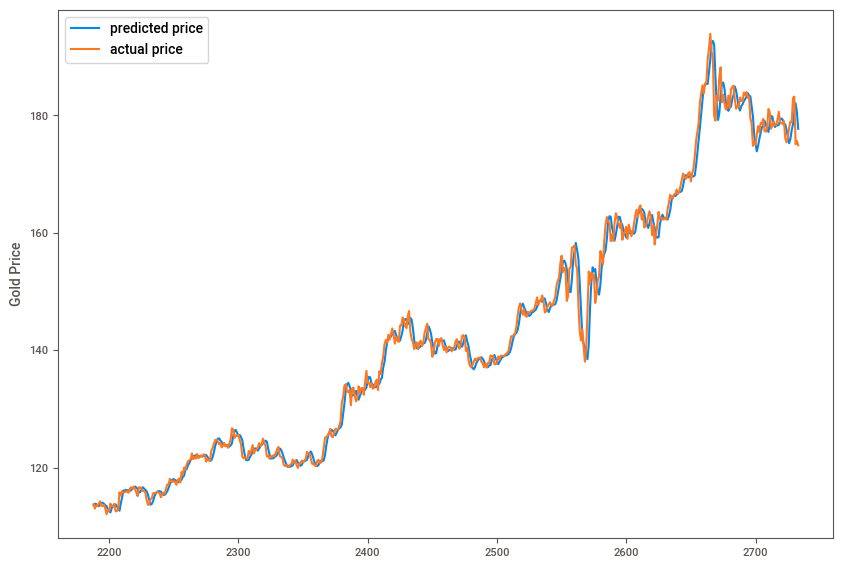

In [80]:
predictedprice = linear.predict(X_test)
predictedprice = pd.DataFrame(
    predictedprice, index=y_test.index, columns=['price'])
predictedprice.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted price', 'actual price'])
plt.ylabel("Gold Price")

### Coefficient of determination

It is used to evaluate the performance of a linear regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s). It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model.

In [59]:
R2Score = linear.score(X_test, y[t:])*100
float("{0:.2f}".format(R2Score))

99.2

The coeffiecent of determination of our model is 99.2 which means our model is well fit and accurate

### USAGE

Now that we have trained and tested our model. we can use it with any other dataset as well to get the decision whether to invest in gold or not. 


We get the recent data from yahoo finance and predict the price for the same.
The steps are same as performed while training. 

In [91]:
gold = yf.download('GLD', '2020-12-01', '2020-12-17')
gold.head()
gold3 = gold['Close'].rolling(window=3).mean()
gold9 = gold['Close'].rolling(window=9).mean()
gold['Avg_3'] = gold3
gold['Avg_9'] = gold9
gold = gold.dropna()
gold['predicted_gold_price'] = linear.predict(gold[['Avg_3', 'Avg_9']])
gold['Result'] = np.where(gold.predicted_gold_price.shift(1) < gold.predicted_gold_price,"Buy","Pass")

[*********************100%***********************]  1 of 1 completed


In [90]:
gold.head()

,Open,High,Low,Close,Adj Close,Volume,Avg_3,Avg_9,predicted_gold_price,Result
Date,,,,,,,,,,
2020-12-11,172.250000,173.320007,172.110001,172.490005,172.490005,6084800,172.386668,172.702223,172.136036,Pass
2020-12-14,171.910004,172.520004,170.910004,171.539993,171.539993,7644400,172.066666,172.853334,171.715882,Pass
2020-12-15,173.429993,173.979996,173.059998,173.940002,173.940002,6848600,172.656667,173.128889,172.371104,Buy
2020-12-16,174.130005,175.020004,173.020004,174.899994,174.899994,8174700,173.459997,173.361111,173.294048,Buy


## Conclusion

We have successfully created a gold price predictor using linear regression model and also, tried using in with an external data set. 
